# Libraries

In [82]:
# Base
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Data loading and cleaning

In [83]:
# load the data
dfSales = pd.read_csv("../data/Carseats.csv")

In [84]:
# check the data
dfSales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [85]:
# check the data types
dfSales.info()

# data types are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [86]:
# check for missing values
dfSales.isnull().sum()

# no missing values

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [87]:
# summary statistics
dfSales.describe()

# standardizing might be a good idea

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Visualizations

/Users/marlonbraun/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


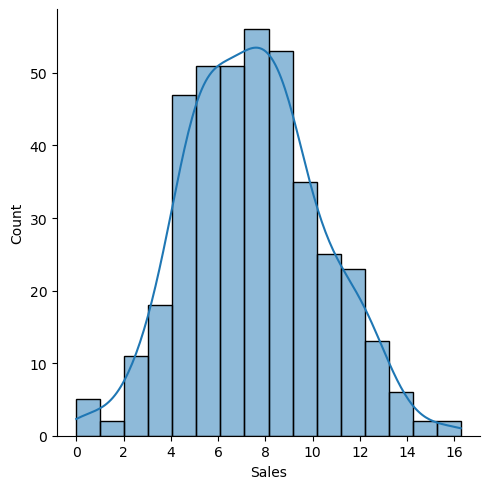

In [88]:
# plot the sales distribution
sns.displot(dfSales.Sales, kde=True)
plt.show()

Text(0, 0.5, 'Sales')

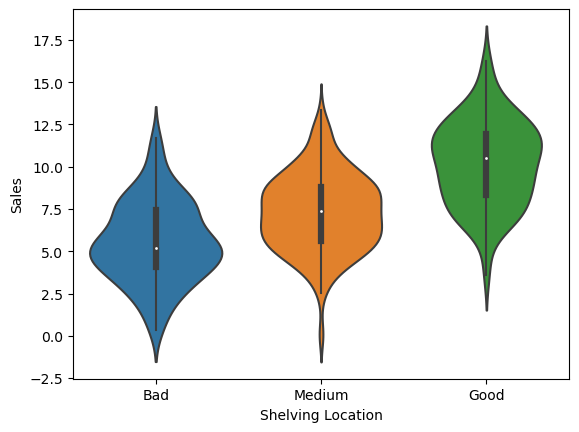

In [89]:
# plot the sales distribution by shelving location using a violin plot, ordering bad, medium, good
sns.violinplot(x="ShelveLoc", y="Sales", data=dfSales, order=["Bad", "Medium", "Good"])
# set axis labels
plt.xlabel("Shelving Location")
plt.ylabel("Sales")

In [90]:
# scatterplots with regression lines

<Axes: xlabel='Price', ylabel='Sales'>

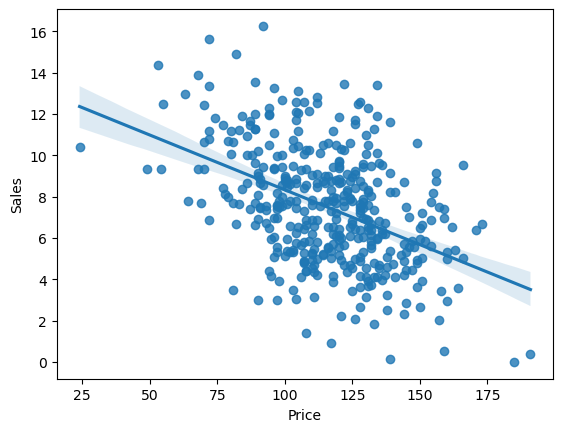

In [91]:
# scatterplot of sales vs price
sns.regplot(x="Price", y="Sales", data=dfSales)

# price strongly negatively correlated with sales

<Axes: xlabel='Income', ylabel='Sales'>

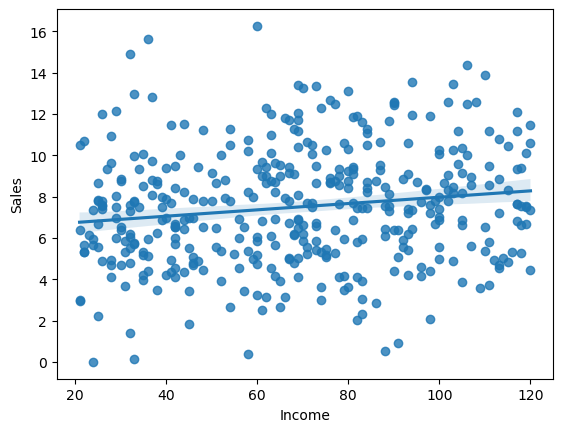

In [92]:
# scatterplot of sales vs income
sns.regplot(x="Income", y="Sales", data=dfSales)

# income slightly positively correlated with sales

<Axes: xlabel='Advertising', ylabel='Sales'>

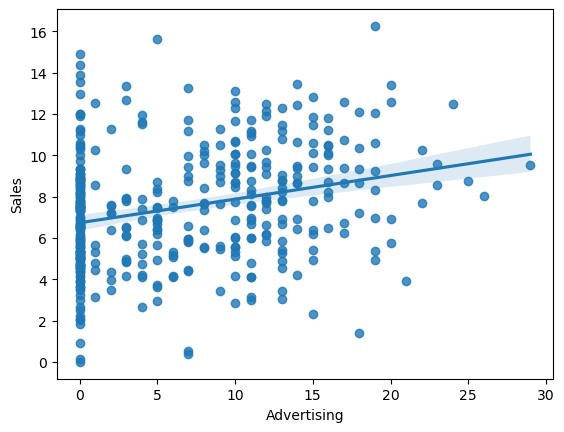

In [93]:
# scatterplot of sales vs advertising
sns.regplot(x="Advertising", y="Sales", data=dfSales)

# advertising spend positively correlated with sales

<Axes: xlabel='Population', ylabel='Sales'>

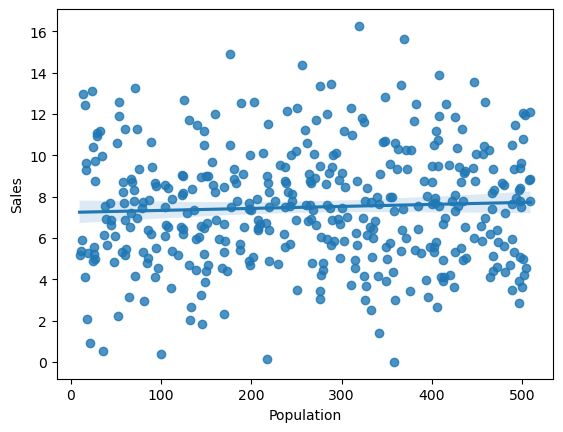

In [94]:
# scatterplot of sales vs population
sns.regplot(x="Population", y="Sales", data=dfSales)

# interestingly, there's almost no correlation between sales and population, even though one would assume that

<Axes: xlabel='Age', ylabel='Sales'>

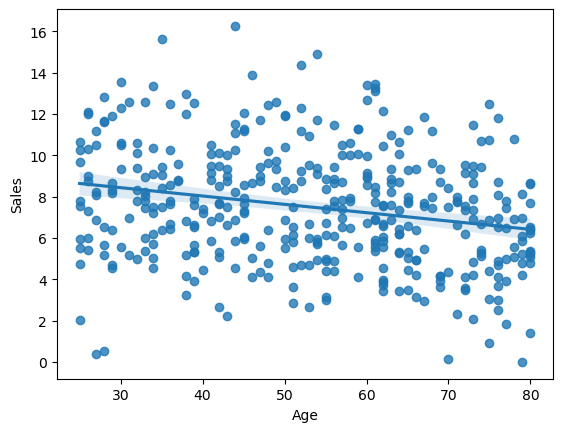

In [95]:
# scatterplot of sales vs age
sns.regplot(x="Age", y="Sales", data=dfSales)

# age slightly negatively correlated with sales, the younger the population, the higher the sales --> more children

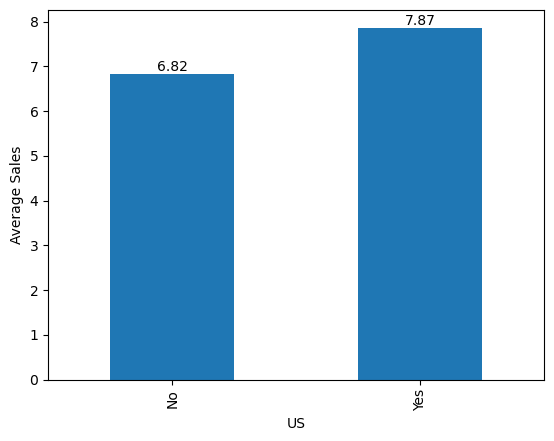

In [96]:
# average sales for US vs non-US locations, plot as bar chart
dfSales.groupby("US").Sales.mean().plot(kind="bar")
plt.ylabel("Average Sales")
# add value labels
for i in range(len(dfSales.groupby("US").Sales.mean())):
    plt.text(x=i, y=dfSales.groupby("US").Sales.mean()[i], s=round(dfSales.groupby("US").Sales.mean()[i], 2), 
             ha="center", va="bottom")

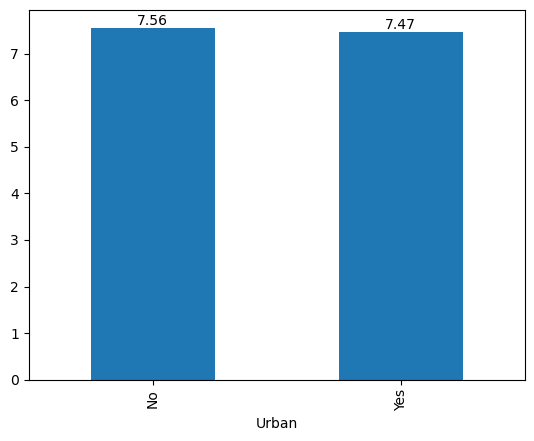

In [97]:
# average sales by urban vs rural, plot as bar chart
dfSales.groupby("Urban").Sales.mean().plot(kind="bar")
# add value labels
for i, v in enumerate(dfSales.groupby("Urban").Sales.mean()):
    plt.text(i, v, round(v, 2), ha="center", va="bottom")

# New feature - difference CompPrice and Price

In [98]:
# create a new feature CompPriceDiff as the difference between the price and the competition price
dfSales["CompPriceDiff"] = dfSales.Price - dfSales.CompPrice

<Axes: xlabel='CompPriceDiff', ylabel='Sales'>

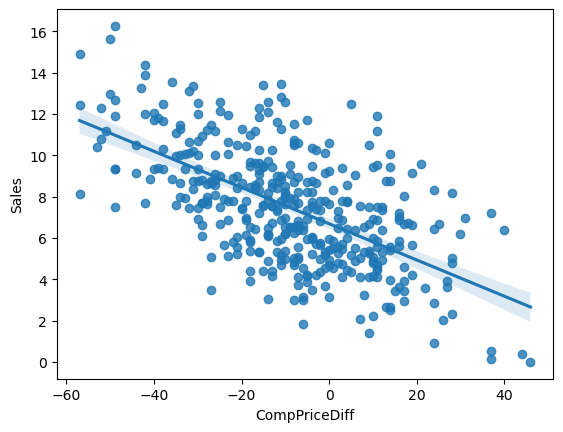

In [99]:
# scatterplot of sales vs CompPriceDiff
sns.regplot(x="CompPriceDiff", y="Sales", data=dfSales)

# highly negatively correlated with sales

# Correlation

In [100]:
# US - replace yes/no with 1/0
dfSales.US = dfSales.US.replace({"Yes": 1, "No": 0})

# Urban - replace yes/no with 1/0
dfSales.Urban = dfSales.Urban.replace({"Yes": 1, "No": 0})

# ShelveLoc - replace bad/medium/good with 0/1/2
dfSales.ShelveLoc = dfSales.ShelveLoc.replace({"Bad": 0, "Medium": 1, "Good": 2})

# check the data
dfSales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,CompPriceDiff
0,9.50,138,73,11,276,120,0,42,17,1,1,-18
1,11.22,111,48,16,260,83,2,65,10,1,1,-28
2,10.06,113,35,10,269,80,1,59,12,1,1,-33
3,7.40,117,100,4,466,97,1,55,14,1,1,-20
4,4.15,141,64,3,340,128,0,38,13,1,0,-13


<Axes: >

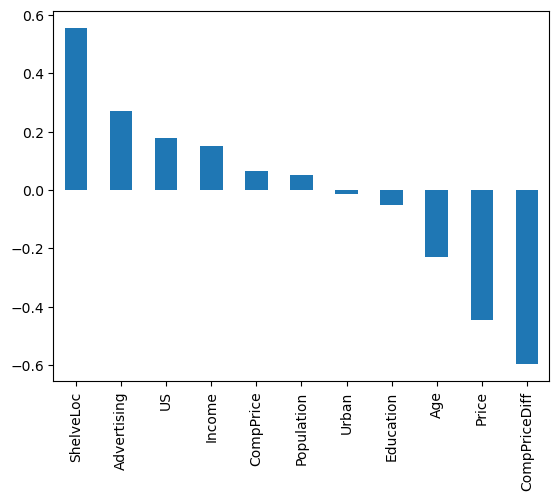

In [101]:
# correlation matrix
dfSales.corr()

# correlation with sales, plotted, sorted, without sales
dfSales.corr().Sales.sort_values(ascending=False)[1:].plot(kind="bar")

# Preprocessing - Standard Scaler

In [102]:
# since we have different scales, we need to standardize the data for the continuous variables
# create a new dataframe with the standardized values
dfSalesScaled = dfSales.copy()

# standardize the continuous variables
scaler = StandardScaler()

# fit the scaler
scaler.fit(dfSalesScaled[["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "CompPriceDiff", "Education"]])

# transform the data
dfSalesScaled[["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "CompPriceDiff", "Education"]] = scaler.transform(dfSalesScaled[["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "CompPriceDiff", "Education"]])

# check the data
dfSalesScaled.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,CompPriceDiff
0,9.50,0.850455,0.155361,0.657177,0.075819,0.177823,0,-0.699782,1.184449,1,1,-0.458454
1,11.22,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,2,0.721723,-1.490113,1,1,-0.978243
2,10.06,-0.781896,-1.204159,0.506621,0.028262,-1.513719,1,0.350895,-0.725953,1,1,-1.238138
3,7.40,-0.520720,1.121336,-0.396715,1.366649,-0.794814,1,0.103677,0.038208,1,1,-0.562412
4,4.15,1.046337,-0.166631,-0.547271,0.510625,0.516132,0,-0.947000,-0.343872,1,0,-0.198559


# Modelling

In [103]:
# set up the features and target
X = dfSalesScaled.drop(columns=["Sales"])
y = dfSalesScaled.Sales

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [104]:
# set up a dataframe to store the results
dfResults = pd.DataFrame(columns=["Model", "MSE", "MAE", "R2"])

## Decision tree

In [105]:
# hyperparameter tuning for random forest regressor
# initialize the model
rf = RandomForestRegressor(random_state=123)


# set up the parameter grid
param_grid = {
    "n_estimators": [400, 800, 1200, 1600],
    "max_depth": [2, 4, 6, 10, 15],
    "min_samples_split": [2, 4, 6, 10]
}

# set up the grid search
gridSearch = GridSearchCV(rf, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

# fit the grid search
gridSearch.fit(X_train, y_train)

# best parameters
print(gridSearch.best_params_)

# best score
print(gridSearch.best_score_)

# best estimator
print(gridSearch.best_estimator_)

# set up random forest regressor with best parameters
rf = gridSearch.best_estimator_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 1200}
-2.0581976809445983
RandomForestRegressor(max_depth=10, n_estimators=1200, random_state=123)


In [106]:
# fit the model
rf.fit(X_train, y_train)

# predict on the test set
y_pred = rf.predict(X_test)

# evaluate the model
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

# add the results to the dataframe
dfResults = dfResults.append({"Model": "Random Forest Regressor", "MSE": mean_squared_error(y_test, y_pred), 
                              "MAE": mean_absolute_error(y_test, y_pred), "R2": r2_score(y_test, y_pred)}, ignore_index=True)

Mean Squared Error:  1.7385651151096042
Mean Absolute Error:  1.0269400992586184
R2 Score:  0.7338764008013251


/var/folders/hn/nrgp7vkd6zq9gprv31pzff840000gn/T/ipykernel_40140/166484437.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResults = dfResults.append({"Model": "Random Forest Regressor", "MSE": mean_squared_error(y_test, y_pred),


## Multivariate Linear Regression

In [107]:
# set up multilinear regression
mlr = LinearRegression()

# hyperparameter tuning for multilinear regression
# set up the parameter grid
param_grid = {"fit_intercept": [True, False]
              }

# set up the grid search
gridSearch = GridSearchCV(mlr, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

# fit the grid search
gridSearch.fit(X_train, y_train)

# best parameters
print(gridSearch.best_params_)

# best score
print("Best score: {:.2f}".format(gridSearch.best_score_))

# best estimator
print(gridSearch.best_estimator_)

# set up multilinear regression with best parameters
mlr = gridSearch.best_estimator_

{'fit_intercept': True}
Best score: -1.13
LinearRegression()


In [108]:
# fit the model
mlr.fit(X_train, y_train)

# predict on the test set
y_pred = mlr.predict(X_test)

# evaluate the model
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

# add the results to the dataframe

dfResults = dfResults.append({"Model": "Multilinear Regression", "MSE": mean_squared_error(y_test, y_pred),
                                "MAE": mean_absolute_error(y_test, y_pred), "R2": r2_score(y_test, y_pred)}, ignore_index=True)


Mean Squared Error:  1.2036032902922262
Mean Absolute Error:  0.8811597763633688
R2 Score:  0.8157634495043106


/var/folders/hn/nrgp7vkd6zq9gprv31pzff840000gn/T/ipykernel_40140/1170177317.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResults = dfResults.append({"Model": "Multilinear Regression", "MSE": mean_squared_error(y_test, y_pred),


## Multilayer Perceptron

In [109]:
# set up multilayer perceptron regressor
mlp = MLPRegressor(random_state=123)

# hyperparameter tuning for multilayer perceptron regressor
# set up the parameter grid
param_grid = {
    "hidden_layer_sizes": [(800,)],
    "activation": ["logistic"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate_init": [0.0001, 0.001, 0.01],
    "max_iter": [400]
}

# set up the grid search, turn off warnings
gridSearch = GridSearchCV(mlp, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)

# fit the grid search
gridSearch.fit(X_train, y_train)

# best parameters
print(gridSearch.best_params_)

# best score
print("Best score: {:.2f}".format(gridSearch.best_score_))

# best estimator
print(gridSearch.best_estimator_)

# set up multilayer perceptron regressor with best parameters
mlp = gridSearch.best_estimator_

/Users/marlonbraun/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marlonbraun/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marlonbraun/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marlonbraun/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marlo

{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (800,), 'learning_rate_init': 0.001, 'max_iter': 400}
Best score: -1.15
MLPRegressor(activation='logistic', alpha=0.001, hidden_layer_sizes=(800,),
             max_iter=400, random_state=123)


/Users/marlonbraun/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [110]:
# fit the model
mlp.fit(X_train, y_train)

# predict on the test set
y_pred = mlp.predict(X_test)

# evaluate the model
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

# add the results to the dataframe
dfResults = dfResults.append({"Model": "MLP Regressor", "MSE": mean_squared_error(y_test, y_pred),
                              "MAE": mean_absolute_error(y_test, y_pred), "R2": r2_score(y_test, y_pred)}, ignore_index=True)

Mean Squared Error:  1.2026647761765799
Mean Absolute Error:  0.8822720032704486
R2 Score:  0.815907108635731


/Users/marlonbraun/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/var/folders/hn/nrgp7vkd6zq9gprv31pzff840000gn/T/ipykernel_40140/72465933.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfResults = dfResults.append({"Model": "MLP Regressor", "MSE": mean_squared_error(y_test, y_pred),


# Model selection

In [111]:
# print the results, basing the decision on the order on the MSE
dfResults.sort_values(by="MSE")

,Model,MSE,MAE,R2
2,MLP Regressor,1.202665,0.882272,0.815907
1,Multilinear Regression,1.203603,0.881160,0.815763
0,Random Forest Regressor,1.738565,1.026940,0.733876


The MLP Regressor is slightly outperforming the Multilinear Regression

With increasing data availability in the future, the more complex model will be able to make even better predictions, so we chose the MLP

# Predicting unseen data

In [157]:
# fabricate a dataset of 10 new observations by sampling from the unique values of each feature, but not copying full rows
# create a new dataframe
dfNew = pd.DataFrame(columns=["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education", "ShelveLoc", "US", "Urban"])

# create a list of unique values for each feature
compPrice = dfSales.CompPrice.unique()
income = dfSales.Income.unique()
advertising = dfSales.Advertising.unique()
population = dfSales.Population.unique()
price = dfSales.Price.unique()
age = dfSales.Age.unique()
education = dfSales.Education.unique()
shelveLoc = dfSales.ShelveLoc.unique()
us = dfSales.US.unique()
urban = dfSales.Urban.unique()

# sample from the unique values
# set np random seed
np.random.seed(123)

dfNew.CompPrice = np.random.choice(compPrice, size=10)
dfNew.Income = np.random.choice(income, size=10)
dfNew.Advertising = np.random.choice(advertising, size=10)
dfNew.Population = np.random.choice(population, size=10)
dfNew.Price = np.random.choice(price, size=10)
dfNew.Age = np.random.choice(age, size=10)
dfNew.Education = np.random.choice(education, size=10)
dfNew.ShelveLoc = np.random.choice(shelveLoc, size=10)
dfNew.US = np.random.choice(us, size=10)
dfNew.Urban = np.random.choice(urban, size=10)

# check the data
dfNew.head()

# create compPriceDiff
dfNew["CompPriceDiff"] = dfNew.Price - dfNew.CompPrice

In [158]:
# standardize the data
dfNew[["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "CompPriceDiff", "Education"]] = scaler.transform(dfNew[["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "CompPriceDiff", "Education"]])

# check the data
dfNew.head()

# order the same way as X
dfNew = dfNew[["CompPrice", "Income", "Advertising", "Population", "Price", "ShelveLoc", "Age",  "Education", "Urban", "US", "CompPriceDiff"]]

In [159]:
# check the data
dfNew.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,CompPriceDiff
0,2.417512,0.656237,1.259401,0.266047,-1.978894,2,-1.750460,0.038208,0,1,-4.356873
1,0.001632,-1.275713,-0.697827,-0.739442,-0.837102,1,-1.008805,0.802369,0,1,-1.030222
2,1.372807,-1.204159,-0.396715,0.782379,1.023595,0,1.216159,1.184449,0,0,0.165293
3,-2.414247,1.264443,2.614405,0.503831,-0.329639,1,-0.823391,-1.108033,0,1,1.516745
4,-0.128956,-1.025275,-0.998939,0.211696,-0.245062,1,0.659918,-1.490113,1,0,-0.198559


In [161]:
# predict the sales for the new data using the Multilayer Perceptron Regressor model
dfNew["Sales"] = mlp.predict(dfNew)

In [163]:
# rescale the features
dfNew[["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "CompPriceDiff", "Education"]] = scaler.inverse_transform(dfNew[["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "CompPriceDiff", "Education"]])


In [164]:
# order by sales
dfNew.sort_values(by="Sales", ascending=False)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,CompPriceDiff,Sales
0,162.0,87.0,15.0,304.0,69.0,2,25.0,14.0,0,1,-93.0,17.850502
8,159.0,22.0,21.0,420.0,83.0,2,35.0,16.0,1,0,-76.0,16.688081
5,150.0,96.0,16.0,434.0,93.0,2,51.0,15.0,0,0,-57.0,15.358098
6,114.0,104.0,8.0,49.0,79.0,1,53.0,14.0,1,1,-35.0,10.714563
1,125.0,33.0,2.0,156.0,96.0,1,37.0,16.0,0,1,-29.0,8.925608
3,88.0,104.0,24.0,339.0,108.0,1,40.0,11.0,0,1,20.0,8.395682
9,151.0,26.0,10.0,499.0,133.0,1,65.0,18.0,1,1,-18.0,7.365119
4,123.0,40.0,0.0,296.0,110.0,1,64.0,10.0,1,0,-13.0,6.417182
2,146.0,35.0,4.0,380.0,140.0,0,73.0,17.0,0,0,-6.0,3.002388
7,116.0,67.0,17.0,396.0,157.0,1,79.0,14.0,0,1,41.0,2.824654


In [165]:
# sales * price
dfNew["Sales*Price"] = dfNew.Sales * dfNew.Price